# Case Study 1

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.DataFrame(pd.read_csv("loans_full_schema.csv", header=0))
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


Data set description

In [3]:
df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

## Data visualizations

Loan amount where annual income is less than 10000 dollars

<AxesSubplot:>

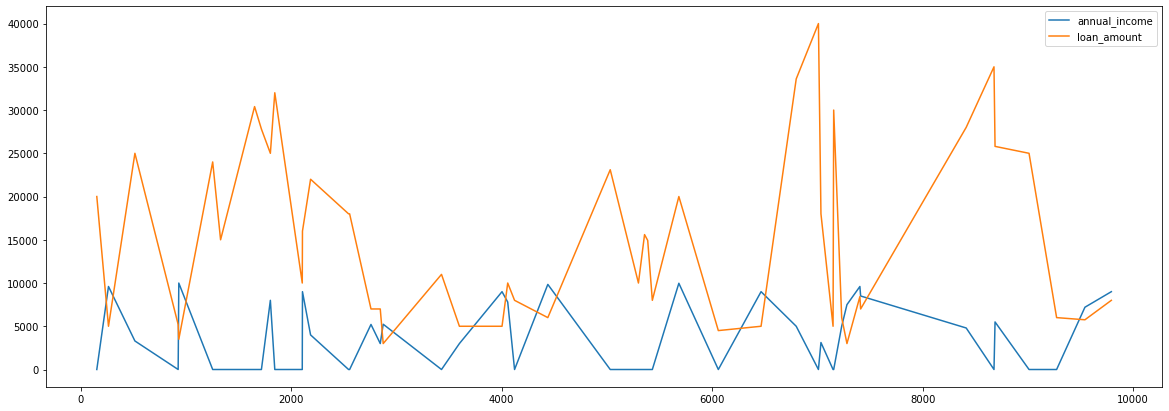

In [5]:
df[df['annual_income'] < 10000][['annual_income', 'loan_amount']].plot(figsize=(20,7))

Paid Interest when interest rate is higher than 30%

<AxesSubplot:xlabel='Interest Rate', ylabel='Paid Interest'>

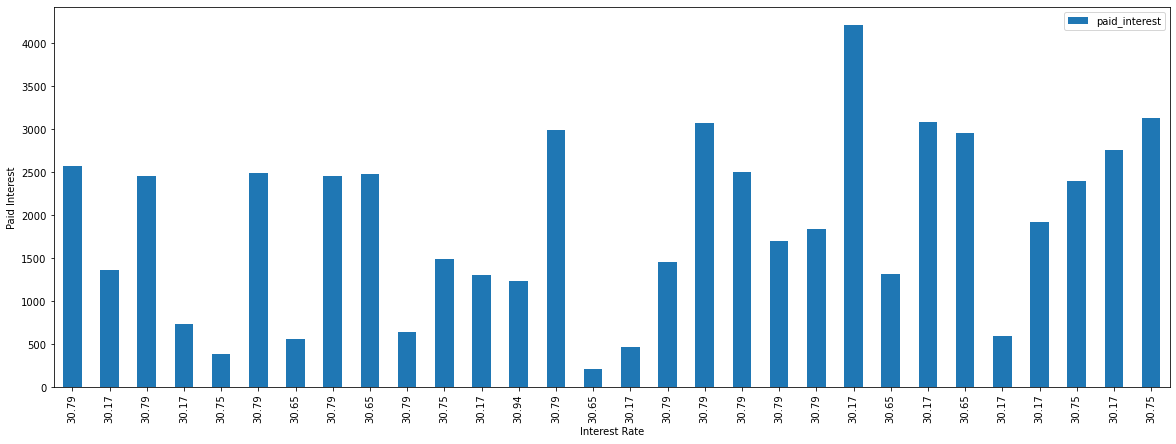

In [6]:
df[df['interest_rate'] > 30][['paid_interest', 'interest_rate']].plot(kind='bar', xlabel="Interest Rate", ylabel="Paid Interest", x='interest_rate', y='paid_interest', figsize=(20,7))

Types of loan purposes. Debt consolidation being the most prominent.

<AxesSubplot:ylabel='Loan Purpose'>

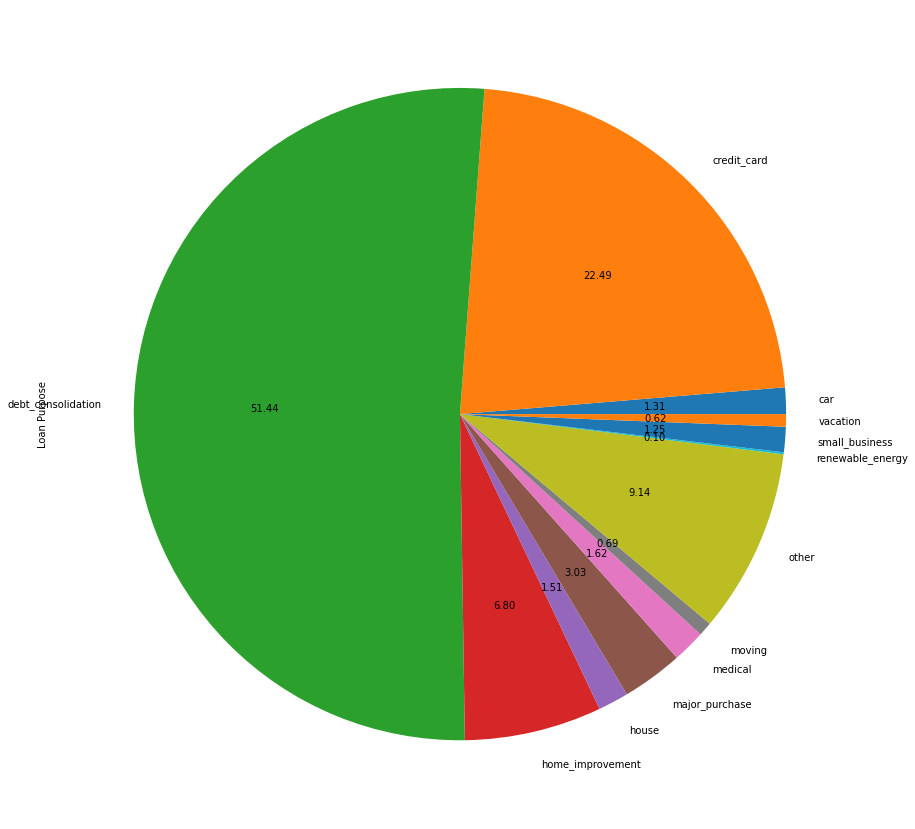

In [7]:
df.groupby(['loan_purpose']).size().plot(kind='pie', figsize=(20,15), ylabel="Loan Purpose", autopct='%.2f', textprops={'fontsize': 10})

Employee titles where total credit utilized is greater than total credit limit

<AxesSubplot:xlabel='emp_title'>

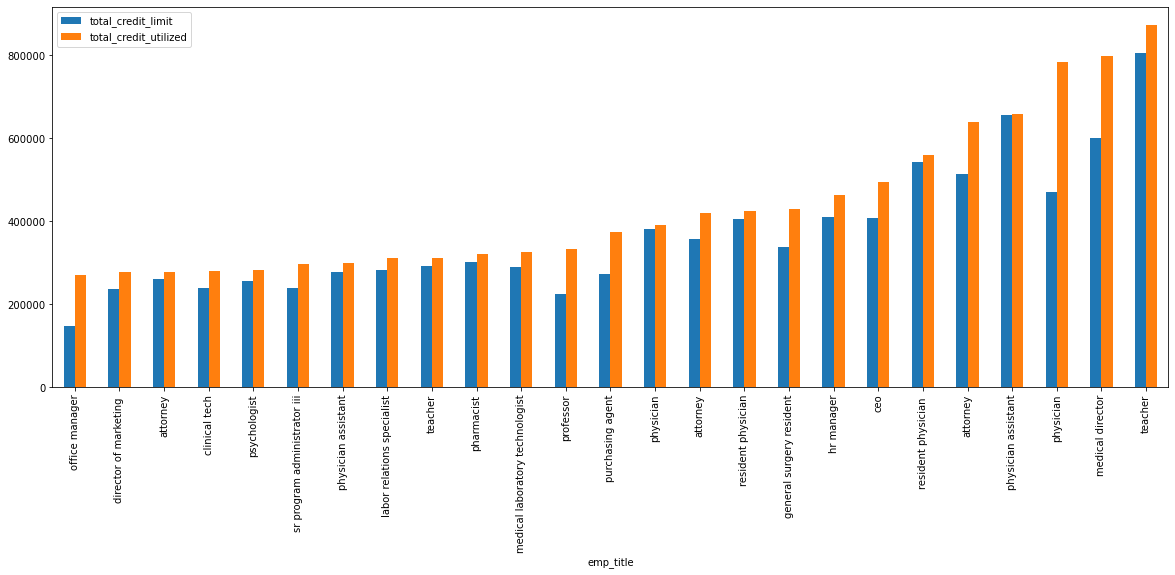

In [8]:
df[df['total_credit_utilized'] > df['total_credit_limit']][['emp_title', 'total_credit_limit', 'total_credit_utilized']].sort_values(by=['total_credit_utilized']).tail(25).plot(kind="bar", x='emp_title', y=['total_credit_limit', 'total_credit_utilized'], figsize=(20,7))

Loan Amount vs Balance paid 

<AxesSubplot:xlabel='emp_title'>

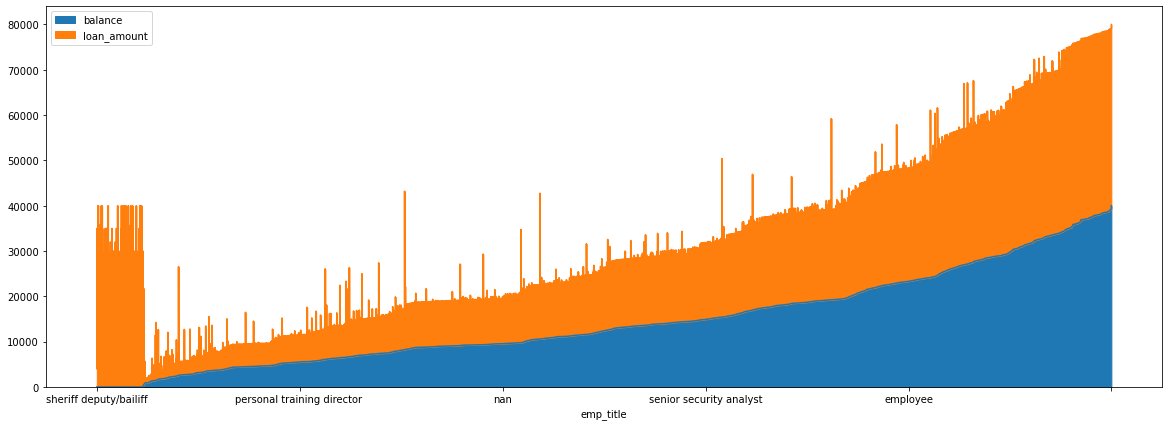

In [9]:
df[['emp_title', 'loan_amount', 'balance']].sort_values(by='balance').plot(kind="area", x='emp_title', y=['balance', 'loan_amount'], figsize=(20,7))

One Hot Encoding to encode Application Type into 1 and 0

In [10]:
df = pd.get_dummies(df, columns=['application_type'])
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,application_type_individual,application_type_joint
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,1,0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,1,0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,1,0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,1,0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0,1,0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0,1,0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0,0,1
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0,1,0


Label Encoding to encode verified income, verfied income of joint accounts, and loan purpose

In [11]:
le = preprocessing.LabelEncoder()

df['verified_income'] = le.fit_transform(df['verified_income'].values)
df['verification_income_joint'] = le.fit_transform(df['verification_income_joint'].values)
df['loan_purpose'] = le.fit_transform(df['loan_purpose'].values)
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,application_type_individual,application_type_joint
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,2,18.01,NaN,3,NaN,...,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,1,0
1,warehouse office clerk,10.0,HI,RENT,40000.0,0,5.04,NaN,3,NaN,...,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,1,0
2,assembly,3.0,WI,RENT,40000.0,1,21.15,NaN,3,NaN,...,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,1,0
3,customer service,1.0,PA,RENT,30000.0,0,10.16,NaN,3,NaN,...,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,1,0
4,security supervisor,10.0,CA,RENT,35000.0,2,57.96,57000.0,2,37.66,...,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,0,1


In [12]:
df['application_type_individual'] = df['application_type_individual'].astype('int8')
df['application_type_joint'] = df['application_type_joint'].astype('int8')
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,application_type_individual,application_type_joint
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,2,18.01,NaN,3,NaN,...,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,1,0
1,warehouse office clerk,10.0,HI,RENT,40000.0,0,5.04,NaN,3,NaN,...,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,1,0
2,assembly,3.0,WI,RENT,40000.0,1,21.15,NaN,3,NaN,...,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,1,0
3,customer service,1.0,PA,RENT,30000.0,0,10.16,NaN,3,NaN,...,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,1,0
4,security supervisor,10.0,CA,RENT,35000.0,2,57.96,57000.0,2,37.66,...,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,0,1


Dropping columns not useful for prediction

In [13]:
temp_df = df.drop(columns=['emp_title', 
                   'state', 
                   'homeownership', 
                   'grade',
                   'sub_grade', 
                   'issue_month', 
                   'loan_status', 
                   'initial_listing_status',
                   'disbursement_method',
                   'balance',
                   'paid_total',
                   'paid_principal',
                   'paid_interest',
                   'paid_late_fees'])
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_length                        9183 non-null   float64
 1   annual_income                     10000 non-null  float64
 2   verified_income                   10000 non-null  int32  
 3   debt_to_income                    9976 non-null   float64
 4   annual_income_joint               1495 non-null   float64
 5   verification_income_joint         10000 non-null  int32  
 6   debt_to_income_joint              1495 non-null   float64
 7   delinq_2y                         10000 non-null  int64  
 8   months_since_last_delinq          4342 non-null   float64
 9   earliest_credit_line              10000 non-null  int64  
 10  inquiries_last_12m                10000 non-null  int64  
 11  total_credit_lines                10000 non-null  int64  
 12  open_

In [14]:
temp_df = temp_df.fillna(0)
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_length                        10000 non-null  float64
 1   annual_income                     10000 non-null  float64
 2   verified_income                   10000 non-null  int32  
 3   debt_to_income                    10000 non-null  float64
 4   annual_income_joint               10000 non-null  float64
 5   verification_income_joint         10000 non-null  int32  
 6   debt_to_income_joint              10000 non-null  float64
 7   delinq_2y                         10000 non-null  int64  
 8   months_since_last_delinq          10000 non-null  float64
 9   earliest_credit_line              10000 non-null  int64  
 10  inquiries_last_12m                10000 non-null  int64  
 11  total_credit_lines                10000 non-null  int64  
 12  open_

## Model Selection

In [15]:
# extract target variable (interest rate) from training data
y = np.log(temp_df[['interest_rate']])

# remove interest rate column from training data
X = temp_df.drop(['interest_rate'], axis=1)

Dividing data into train and test set 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=25)

### Implementing Linear Regression

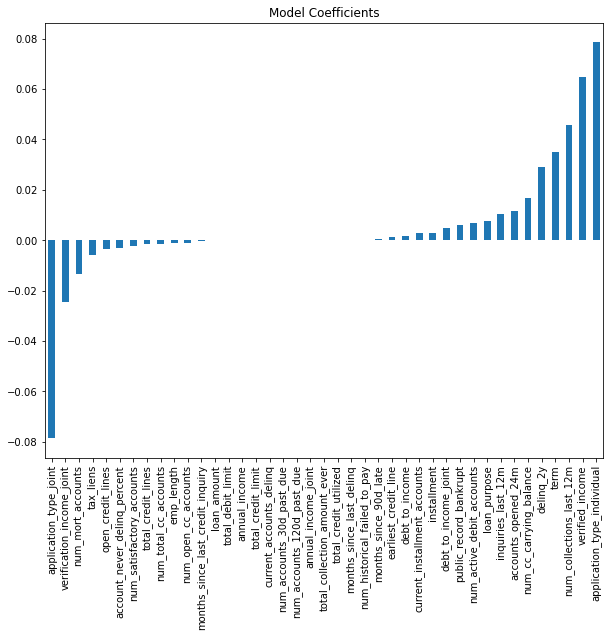

In [17]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

predictors = X_train.columns

coef = pd.Series(regression_model.coef_.flatten(), predictors).sort_values()
plt.figure(figsize=(10,8))
 
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

Variables showing Positive effect on regression model are application_type_individual, verified_income, num_collections_last_12m, term, and delinq_2y -- these factors highly influencing our model.

Higher the value of beta coefficient, higher is the impact.

### Implementing Ridge Regularization

In [18]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 10}
-0.06890449790461525


The negative sign is because of the known error in Grid Search Cross Validation library, so ignore the negative sign.

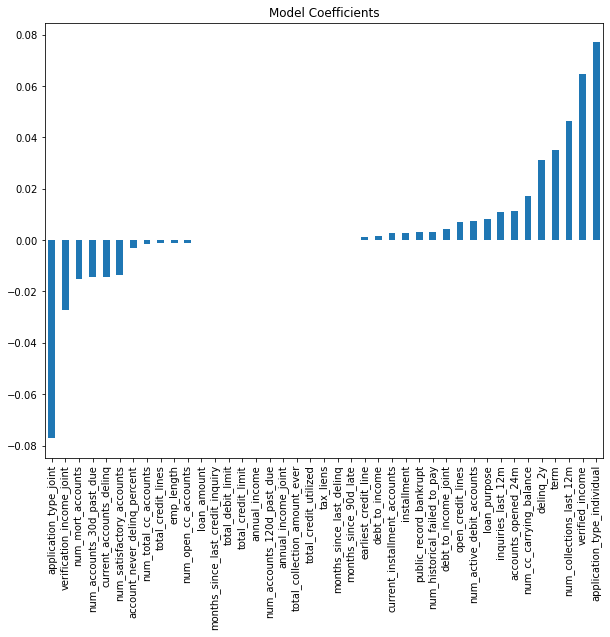

In [19]:
predictors = X_train.columns
 
coef = pd.Series(ridge_regressor.best_estimator_.coef_.flatten(),predictors).sort_values()
plt.figure(figsize=(10,8))
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

Top 5 variables influencing regression model are:

1. application_type_individual
2. verified_income
3. num_collections_last_12m
4. term
5. delinq_2y

Higher the beta coefficient, more significant is that predictor